# Simple Linear Regression

Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

 # Introduction to Salary Prediction Model

## Overview
This project aims to build and evaluate a linear regression model that predicts the salary of an individual based on their years of experience. The dataset consists of two variables: 'Years of Experience' and 'Salary'. We will use Python libraries such as NumPy, Pandas, Matplotlib, and scikit-learn to process the data, train the regression model, and visualize the results.

## Objectives
1. Load and explore the dataset to understand its structure and key statistics.
2. Split the data into training and testing sets to ensure the model's performance is evaluated accurately.
3. Train a linear regression model using the training set.
4. Evaluate the model's performance using the testing set.
5. Visualize the actual versus predicted salaries to assess the model's effectiveness.

## Tools and Libraries
- **NumPy:** For numerical operations.
- **Pandas:** For data manipulation and analysis.
- **Matplotlib:** For creating static, interactive, and animated visualizations in Python.
- **scikit-learn:** For implementing machine learning algorithms.

By the end of this project, we will have a functional model that can predict salaries based on years of experience, which can be useful for HR departments in setting salary scales or for job seekers to negotiate their pay based on their experience level.


## Importing the libraries

In [1]:
# Install NumPy for numerical operations
!pip install numpy

# Install Matplotlib for plotting
!pip install matplotlib

# Install Pandas for data manipulation
!pip install pandas

# Install scikit-learn for machine learning tools
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import pandas as pd  # Importing Pandas for data manipulation

from sklearn.model_selection import train_test_split  # Importing train_test_split to split the dataset
from sklearn.linear_model import LinearRegression  # Importing LinearRegression for building the regression model

# Load the dataset
dataset = pd.read_csv('Salary_Data.csv')  # Reading the CSV file containing the salary data

# Display the dataset
dataset  # Printing the first few rows of the dataset to explore




,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
dataset.head()  # Displaying the first few rows of the dataset to explore its structure


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.shape  # Displaying the dimensions of the dataset (number of rows and columns)


(30, 2)

In [4]:
dataset.info()  # Displaying a concise summary of the dataset, including column names, non-null counts, and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
dataset.describe()  # Generating descriptive statistics for the dataset, such as mean, median, and standard deviation


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
X = dataset.drop('Salary', axis=1)  # Dropping the 'Salary' column to create the feature matrix X


In [7]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [8]:
y = dataset.Salary  # Extracting the 'Salary' column to create the target vector y



In [9]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split  # Importing train_test_split to split the dataset into training and testing sets


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.30)  
# Splitting the dataset into training and testing sets
# X_train and y_train are the training data and labels
# X_test and y_test are the testing data and labels
# random_state=0 ensures reproducibility of the results
# test_size=0.30 means 30% of the data will be used for testing and 70% for training


In [14]:
print(X_train.shape)  # Printing the dimensions of the training feature matrix to verify the split


(21, 1)


In [15]:
X_test.shape  # Displaying the dimensions of the testing feature matrix to verify the split


(9, 1)

In [17]:
from sklearn.linear_model import LinearRegression  # Importing LinearRegression for building the regression model


In [18]:
LR = LinearRegression()  # Creating an instance of the LinearRegression model
# LinearRegression is a class from the sklearn library used for fitting a linear model to the data.
# The instance 'LR' can be used to train the model with the 'fit' method and make predictions with the 'predict' method.


In [19]:
LR.fit(X_train, y_train)  # Fitting the LinearRegression model to the training data
# The 'fit' method trains the LinearRegression model using the training data.
# 'X_train' represents the input features, and 'y_train' represents the target variable.
# This process finds the best-fit line that minimizes the difference between the predicted and actual values.



LinearRegression()

In [20]:
# Predicting the test set results
y_pred = LR.predict(X_test)

In [21]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

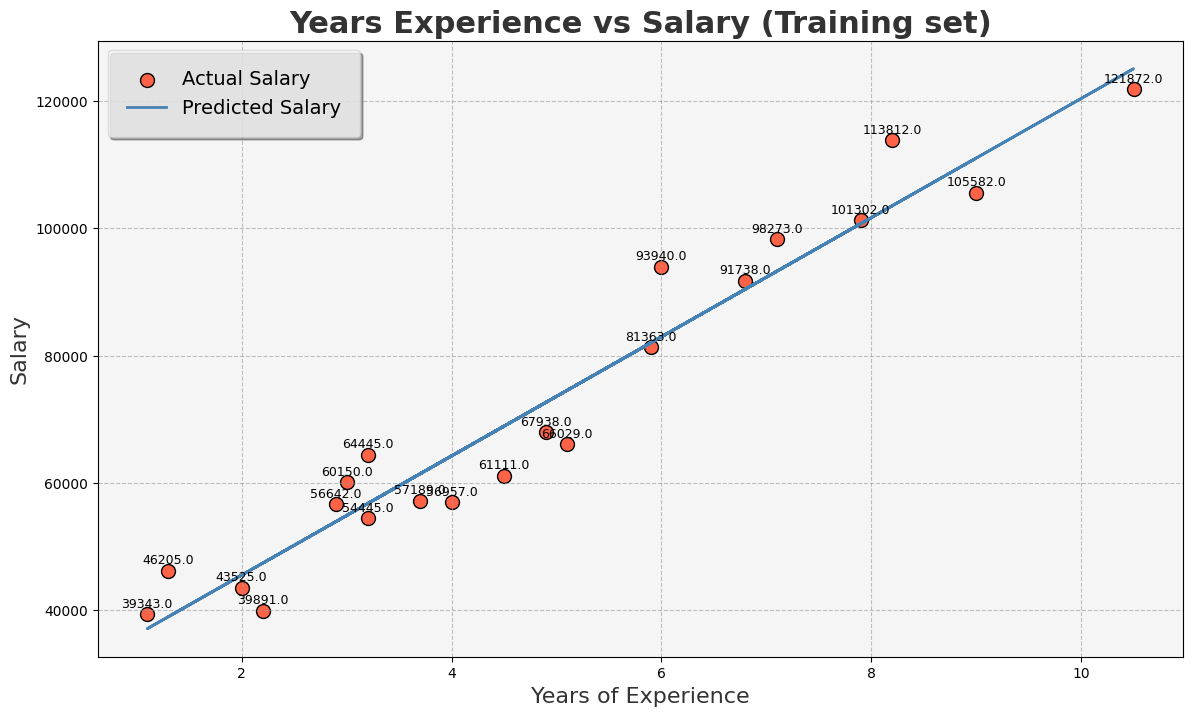

In [22]:
# Visualize the Training Set
plt.figure(figsize=(14, 8))  # Creating a new figure with specified size

# Define colors
actual_color = '#FF6347'  # Color for actual data points (Tomato)
predicted_color = '#4682B4'  # Color for predicted regression line (SteelBlue)

# Plot actual data points
plt.scatter(X_train, y_train, color=actual_color, label='Actual Salary', edgecolor='black', s=100)  
# Scatter plot for actual salary data
# edgecolor='black' adds a black edge around each point
# s=100 sets the size of the points

# Plot regression line
plt.plot(X_train, LR.predict(X_train), color=predicted_color, linewidth=2, label='Predicted Salary')  
# Plotting the regression line based on the model predictions for the training data
# linewidth=2 sets the thickness of the regression line

# Adding titles and labels with improved font sizes and styles
plt.title('Years Experience vs Salary (Training set)', fontsize=22, fontweight='bold', color='#333333')  
# Title with font size 22, bold weight, and dark gray color
plt.xlabel('Years of Experience', fontsize=16, color='#333333')  
# X-axis label with font size 16 and dark gray color
plt.ylabel('Salary', fontsize=16, color='#333333')  
# Y-axis label with font size 16 and dark gray color

# Adding a grid with custom styling
plt.grid(True, linestyle='--', alpha=0.6, color='#999999')  
# Grid with dashed lines, partial transparency, and light gray color

# Adding a legend with an improved font size
plt.legend(fontsize=14, loc='best', fancybox=True, framealpha=0.7, shadow=True, borderpad=1)  
# Legend with font size 14, placed in the best location
# fancybox=True for a rounded box
# framealpha=0.7 for semi-transparent background
# shadow=True for shadow effect
# borderpad=1 for padding between the border and text

# Adding a background style
plt.gca().set_facecolor('#f5f5f5')  # Setting the background color of the plot area to light gray

# Adding annotations for more clarity
for i, txt in enumerate(y_train):  
    plt.annotate(f'{txt}', (X_train.values[i], y_train.values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')  
    # Annotating each data point with its salary value
    # textcoords="offset points" specifies that the text position is offset from the data point
    # xytext=(0,5) sets the offset (0 points horizontally and 5 points vertically)
    # ha='center' centers the annotation horizontally
    # fontsize=9 sets the font size of the annotation text
    # color='black' sets the color of the annotation text

# Display the plot
plt.show()  # Displaying the plot with the training data and regression line




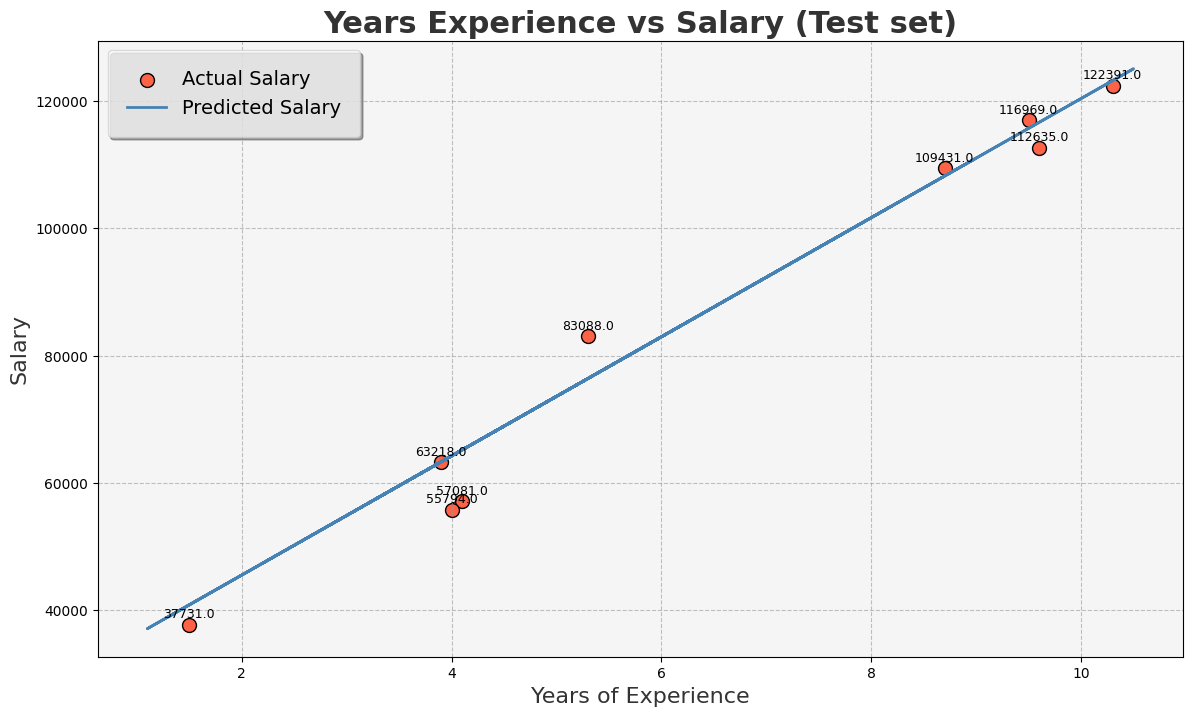

In [23]:
# Visualize the Test Set
plt.figure(figsize=(14, 8))

# Plot actual data points
plt.scatter(X_test, y_test, color=actual_color, label='Actual Salary', edgecolor='black', s=100)

# Plot regression line
plt.plot(X_train, LR.predict(X_train), color=predicted_color, linewidth=2, label='Predicted Salary')

# Adding titles and labels with improved font sizes and styles
plt.title('Years Experience vs Salary (Test set)', fontsize=22, fontweight='bold', color='#333333')
plt.xlabel('Years of Experience', fontsize=16, color='#333333')
plt.ylabel('Salary', fontsize=16, color='#333333')

# Adding a grid with custom styling
plt.grid(True, linestyle='--', alpha=0.6, color='#999999')

# Adding a legend with an improved font size
plt.legend(fontsize=14, loc='best', fancybox=True, framealpha=0.7, shadow=True, borderpad=1)

# Adding a background style
plt.gca().set_facecolor('#f5f5f5')

# Adding annotations for more clarity
for i, txt in enumerate(y_test):
    plt.annotate(f'{txt}', (X_test.values[i], y_test.values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')

# Display the plot
plt.show()

In [24]:
# Function to predict salary based on years of experience
def predict_salary(years_experience):  # Define a function named predict_salary with a parameter years_experience
    return LR.predict([[years_experience]])[0]  # Use the trained model to predict salary; input must be a 2D array

# Example usage
years = float(input("Enter years of experience: "))  # Take user input, convert it to float, and store in years

predicted_salary = predict_salary(years)  # Call predict_salary function with the input years

print(f"Predicted Salary: ${predicted_salary:.2f}")  # Print the predicted salary, formatted to two decimal places


Enter years of experience: 23
Predicted Salary: $242063.40


C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
import joblib  # Importing joblib for model serialization

# Save the model to a file
joblib.dump(LR, 'linear_regression_model.pkl')  
# Saving the trained LinearRegression model as 'linear_regression_model.pkl'


['linear_regression_model.pkl']

In [23]:
loaded_regressor = joblib.load('linear_regression_model.pkl')  
# Loading the saved LinearRegression model from 'linear_regression_model.pkl' into loaded_regressor


In [24]:
hours = float(input("Enter years of experience: "))  # Prompting user input for years of experience
predicted_salary = loaded_regressor.predict([[hours]])  # Predicting salary based on input
print(f"Predicted Salary: ${predicted_salary[0]:.2f}")  # Displaying predicted salary formatted to two decimal places


Enter years of experience: 45
Predicted Salary: $447989.15


C:\Users\Suaiman Ureiga\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
